## Модель прогнозирования занятости населения Украины на основании характеристик рабочей силы (метод классификации).
### Источник данных: http://www.ukrstat.gov.ua/ Статистична інформація/ Файли мікроданих/ Демографічна та соціальна статистика/ Ринок праці/ Зайнятість та безробіття:
### "Анонімні мікродані за показниками щодо робочої сили та їх характеристиками (2019)"


In [1]:
# Импортируем нужные библиотеки:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Загружаем файл с данными:

df = pd.read_excel('LFS_2019.xlsx')
df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,special_dipl,labour_force,stat_empl,occupation,informal_empl,actual_duration,reason_unempl,way_job_search,durat_job_search,reason_inactiv
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,Професіонали,Зайняті,Працюючі за наймом,Професіонали,Формальна зайнятість,40 годин,0,0,0,0
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,Професіонали,Зайняті,Працюючі за наймом,Працівники сфери торгівлі та послуг,Неформальна зайнятість,понад 40 годин,0,0,0,0
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,Не мають спеціальності,"Особи, які не входять до робочої сили",0,0,0,0,0,0,0,"учні, студенти"
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,Фахівці,"Особи, які не входять до робочої сили",0,0,0,0,0,0,0,пенсіонери
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,Фахівці,Зайняті,Працюючі за наймом,Фахівці,Формальна зайнятість,40 годин,0,0,0,0
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,Кваліфіковані робітники з інструментом,Безробітні,0,0,0,0,"Звільнені за власним бажанням, за угодою сторін",особисті звязки,до 3 місяців,0
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,Не мають спеціальності,"Особи, які не входять до робочої сили",0,0,0,0,0,0,0,"учні, студенти"


### Ключи к данным ('М+' участие в модели):
1. kod_res - код опрашиваемого  (M-)
2. kod_obs - код анкеты (M-)
3. year - год анкетирования (M-)
4. weight_year - вес возраста (M-) 
5. tp_ar - тип местности (M+)
6. rg - области (M+)
7. age_gr - интервальное распределение по возрасту (M-)
8. age_gr_20_64 -респондент принадлежит к группе 20-64 лет (M+)
9. sex - пол (M+)
10. marital_st - семейное положение (M+)
11. education - уровень образоваания (M+)
12. special_dipl - уровень диплома (M+)
13. labour_force - работают\нет \не рабочая сила - (y)
14. stat_empl - наемные\сами на себя (М-)
15. occupation - професия за основным местом работы (М-)
16. informal_empl - формальная\не формальная занятость (М-)
17. actual_duration - фактичесаки отработанные часы\неделя (М-)
18. reason_unempl - причины безработности (М-)
19. way_job_search - способ поиска работы (М-)
20. durat_job_search - период поисков работы (М-)
21. reason_inactiv - причины безработности не рабочей силы (М-)


In [3]:
# Общие сведения о данных:      

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277212 entries, 0 to 277211
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   kod_res           277212 non-null  int64  
 1   kod_obs           277212 non-null  int64  
 2   year              277212 non-null  int64  
 3   weight_year       277212 non-null  float64
 4   tp_ar             277212 non-null  object 
 5   rg                277212 non-null  object 
 6   age_gr            277212 non-null  object 
 7   age_gr_20_64      277212 non-null  object 
 8   sex               277212 non-null  object 
 9   marital_st        277212 non-null  object 
 10  education         277212 non-null  object 
 11  special_dipl      277212 non-null  object 
 12  labour_force      277212 non-null  object 
 13  stat_empl         277212 non-null  object 
 14  occupation        277212 non-null  object 
 15  informal_empl     277212 non-null  object 
 16  actual_duration   27

In [4]:
# Подсчитываем кол-во значений для labour_force (рабочая сила):

df['labour_force'].value_counts()

Особи, які не входять до робочої сили    140536
Зайняті                                  132606
Безробітні                                 4070
Name: labour_force, dtype: int64

In [5]:
# Проверка отсутствующих значений (пустых ячеек):  

print(f'Количество пустых значений в наборе данных: {df.isnull().sum().sum()}')

Количество пустых значений в наборе данных: 0


In [6]:
# Проверяем, что ноли в наборе данных это не пропуски, а негативные ответы:

df_null = df[df['stat_empl']== 0].count()[0]

df_null

# Например ноли в колонке 'stat_empl' равны кол-ву всех неработающих(140536+4070=144606)

144606

## ПРЕОБРАЗОВАНИЕ ДАННЫХ:

In [7]:
# Преобразовываем (кодируем) колонку labour_force:
# Для значений 'Зайняті' присваиваем '1';
# Для значений 'Безробітні' и 'Особи, які не входять до робочої сили' - 0 (обе категории не работают)

def labour_force(x):
    if x == 'Зайняті':
        return 1
    
    else:
        return 0
    
df['labour_force_v2'] = df['labour_force'].map(labour_force)

df.head(7) 

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,labour_force,stat_empl,occupation,informal_empl,actual_duration,reason_unempl,way_job_search,durat_job_search,reason_inactiv,labour_force_v2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,Зайняті,Працюючі за наймом,Професіонали,Формальна зайнятість,40 годин,0,0,0,0,1
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,Зайняті,Працюючі за наймом,Працівники сфери торгівлі та послуг,Неформальна зайнятість,понад 40 годин,0,0,0,0,1
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,"Особи, які не входять до робочої сили",0,0,0,0,0,0,0,"учні, студенти",0
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,"Особи, які не входять до робочої сили",0,0,0,0,0,0,0,пенсіонери,0
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,Зайняті,Працюючі за наймом,Фахівці,Формальна зайнятість,40 годин,0,0,0,0,1
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,Безробітні,0,0,0,0,"Звільнені за власним бажанням, за угодою сторін",особисті звязки,до 3 місяців,0,0
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,"Особи, які не входять до робочої сили",0,0,0,0,0,0,0,"учні, студенти",0


In [8]:
# Проверка преобразования:

df['labour_force_v2'].value_counts()

0    144606
1    132606
Name: labour_force_v2, dtype: int64

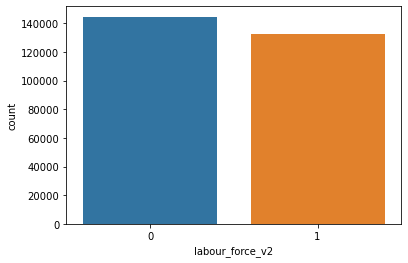

In [9]:
sns.countplot(x='labour_force_v2', data=df)

In [10]:
# Кодируем колонку sex:

df['sex_2'] = pd.get_dummies(df['sex'], drop_first=True)

df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,stat_empl,occupation,informal_empl,actual_duration,reason_unempl,way_job_search,durat_job_search,reason_inactiv,labour_force_v2,sex_2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,Працюючі за наймом,Професіонали,Формальна зайнятість,40 годин,0,0,0,0,1,1
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,Працюючі за наймом,Працівники сфери торгівлі та послуг,Неформальна зайнятість,понад 40 годин,0,0,0,0,1,0
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,0,0,0,0,0,0,0,"учні, студенти",0,1
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,0,0,0,0,0,0,0,пенсіонери,0,1
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,Працюючі за наймом,Фахівці,Формальна зайнятість,40 годин,0,0,0,0,1,0
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,0,0,0,0,"Звільнені за власним бажанням, за угодою сторін",особисті звязки,до 3 місяців,0,0,1
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,0,0,0,0,0,0,0,"учні, студенти",0,0


In [11]:
# v1_Пробуем такую разбивку возраста:

top_age = df['age_gr'].value_counts()[:10]

top_age

60-70 років    60438
50-59 років    51372
40-49 років    45876
71 і старші    43866
15-24 роки     21706
35-39 років    20779
30-34 роки     19124
25-29 років    14051
Name: age_gr, dtype: int64

In [12]:
# Колонку с возрастом категоризируем. Чем больше значение присваиваем - тем человек старше:
#def age_cat(x):
    #if x == '15-24 роки':
        #return 1    
    #elif x == '25-29 років' or x == '30-34 роки' or '35-39 років':
        #return 2   
    #elif x == '40-49 років' or x == '50-59 років':
        #return 3
    #else:
        #return 4
# кореляция на такой разбивке хуже чем в v2

In [13]:
# v2_Разбивку возраста укрупняем. Подсчитываем значения:

top_age_2 = df['age_gr_20_64'].value_counts()[:10]

top_age_2

20-64 роки    190262
0              86950
Name: age_gr_20_64, dtype: int64

In [14]:
# v2_Колонку с возрастом кодируем: рабочий возвраст или нет

def age_cat(x):
    if x == '20-64 роки':
        return 1
    else:
        return 0
    
df['age_gr_2'] = df['age_gr_20_64'].map(age_cat)

df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,occupation,informal_empl,actual_duration,reason_unempl,way_job_search,durat_job_search,reason_inactiv,labour_force_v2,sex_2,age_gr_2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,Професіонали,Формальна зайнятість,40 годин,0,0,0,0,1,1,1
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,Працівники сфери торгівлі та послуг,Неформальна зайнятість,понад 40 годин,0,0,0,0,1,0,1
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,0,0,0,0,0,0,"учні, студенти",0,1,0
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,0,0,0,0,0,0,пенсіонери,0,1,0
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,Фахівці,Формальна зайнятість,40 годин,0,0,0,0,1,0,1
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,0,0,0,"Звільнені за власним бажанням, за угодою сторін",особисті звязки,до 3 місяців,0,0,1,1
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,0,0,0,0,0,0,"учні, студенти",0,0,0


In [15]:
# Проверка преобразования:
df['age_gr_2'].value_counts()


1    190262
0     86950
Name: age_gr_2, dtype: int64

In [16]:
# Оцениваем значенийя tp_ar (тип местности):

df['tp_ar'].value_counts()

міська      140347
сільська    136865
Name: tp_ar, dtype: int64

In [17]:
# Колонку 'tp_ar' кодируем: 

def tp_ar_cat(x):
    if x == 'міська':
        return 1
    else:
        return 0
    
df['tp_ar_2'] = df['tp_ar'].map(tp_ar_cat)

df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,informal_empl,actual_duration,reason_unempl,way_job_search,durat_job_search,reason_inactiv,labour_force_v2,sex_2,age_gr_2,tp_ar_2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,Формальна зайнятість,40 годин,0,0,0,0,1,1,1,1
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,Неформальна зайнятість,понад 40 годин,0,0,0,0,1,0,1,1
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,0,0,0,0,0,"учні, студенти",0,1,0,1
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,0,0,0,0,0,пенсіонери,0,1,0,1
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,Формальна зайнятість,40 годин,0,0,0,0,1,0,1,1
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,0,0,"Звільнені за власним бажанням, за угодою сторін",особисті звязки,до 3 місяців,0,0,1,1,1
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,0,0,0,0,0,"учні, студенти",0,0,0,1


In [18]:
# Проверка преобразования:

df['tp_ar_2'].value_counts()

1    140347
0    136865
Name: tp_ar_2, dtype: int64

In [19]:
# Оцениваем значения rg (область):

df['rg'].value_counts()

Дніпропетровська          15555
Львівська                 15102
Київська (без м.Києва)    13291
Запорізька                13199
Луганська                 12984
Харківська                12719
Одеська                   12612
Херсонська                11908
Волинська                 11596
м.Київ                    11235
Миколаївська              11197
Чернігівська              11074
Вінницька                 11004
Полтавська                10922
Житомирська               10327
Івано-Франківська         10225
Донецька                   9938
Черкаська                  9560
Кіровоградська             9437
Рівненська                 9413
Сумська                    9275
Тернопільська              9105
Чернівецька                8905
Хмельницька                8414
Закарпатська               8215
Name: rg, dtype: int64

In [20]:
# v2_Колонку 'rg' группируем (v_1 была более мелкая разбивка):
# 'C' - Центр; 'E' - Восток; 'W' - Запад; 'S' - Юг

def rg_group (x):
    if x == 'Київська (без м.Києва)' or x == 'м.Київ' or x == 'Чернігівська' or x == 'Полтавська' or x == 'Житомирська'or x == 'Сумська':
        return 'C'
    elif x == 'Дніпропетровська' or x == 'Запорізька' or x == 'Луганська' or x == 'Харківська' or x == 'Донецька':
        return 'E'
    elif x == 'Львівська' or x == 'Волинська' or x == 'Івано-Франківська' or x == 'Рівненська' or x == 'Тернопільська' or x == 'Чернівецька' or x == 'Хмельницька'or x == 'Закарпатська':
        return 'W'   
    else:
        return 'S'
    
df['rg_2'] = df['rg'].map(rg_group)

df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,actual_duration,reason_unempl,way_job_search,durat_job_search,reason_inactiv,labour_force_v2,sex_2,age_gr_2,tp_ar_2,rg_2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,40 годин,0,0,0,0,1,1,1,1,S
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,понад 40 годин,0,0,0,0,1,0,1,1,S
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,0,0,0,0,"учні, студенти",0,1,0,1,S
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,0,0,0,0,пенсіонери,0,1,0,1,S
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,40 годин,0,0,0,0,1,0,1,1,S
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,0,"Звільнені за власним бажанням, за угодою сторін",особисті звязки,до 3 місяців,0,0,1,1,1,S
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,0,0,0,0,"учні, студенти",0,0,0,1,S


In [21]:
# Проверка преобразования:

df.groupby(['rg_2', 'rg', 'labour_force_v2'])[['kod_res']].count().reset_index()

,rg_2,rg,labour_force_v2,kod_res
0,C,Житомирська,0,5745
1,C,Житомирська,1,4582
2,C,Київська (без м.Києва),0,7521
3,C,Київська (без м.Києва),1,5770
4,C,Полтавська,0,6091
5,C,Полтавська,1,4831
6,C,Сумська,0,4469
7,C,Сумська,1,4806
8,C,Чернігівська,0,6080
9,C,Чернігівська,1,4994


In [22]:
# Кодируем rg_2 в отдельном датасете:

df_rg_2 = pd.get_dummies(df['rg_2'], drop_first=True)

df_rg_2.head(7)

,E,S,W
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0


In [23]:
# Оцениваем значения marital_st (семейное положение):

df['marital_st'].value_counts()

Одружений/(на)                 154088
Удівець/удова                   50325
Ніколи не перебував у шлюбі     42685
Розлучений/(на)                 30114
Name: marital_st, dtype: int64

In [24]:
# Колонку с семейным положением категоризируем и кодируем: да\нет

def marital_st_cat(x):
    if x == 'Одружений/(на)':
        return 1
    else:
        return 0
    
df['marital_st_2'] = df['marital_st'].map(marital_st_cat)

df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,reason_unempl,way_job_search,durat_job_search,reason_inactiv,labour_force_v2,sex_2,age_gr_2,tp_ar_2,rg_2,marital_st_2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,0,0,0,0,1,1,1,1,S,1
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,0,0,0,0,1,0,1,1,S,1
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,0,0,0,"учні, студенти",0,1,0,1,S,0
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,0,0,0,пенсіонери,0,1,0,1,S,1
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,0,0,0,0,1,0,1,1,S,1
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,"Звільнені за власним бажанням, за угодою сторін",особисті звязки,до 3 місяців,0,0,1,1,1,S,0
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,0,0,0,"учні, студенти",0,0,0,1,S,0


In [25]:
# Проверка преобразования:

df['marital_st_2'].value_counts()

1    154088
0    123124
Name: marital_st_2, dtype: int64

In [26]:
# Оцениваем значения колонки с уровнем образования:

df['education'].value_counts()

Вища освіта                           106736
Середня освіта та початкова освіта    103899
Професійно-технічна                    66577
Name: education, dtype: int64

In [27]:
# Колонку с образованием кодируем:

def education_cat(x):
    if x == 'Вища освіта':
        return 3
    elif x == 'Професійно-технічна':
        return 2
    else:
        return 1
    
df['education_2'] = df['education'].map(education_cat)

df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,way_job_search,durat_job_search,reason_inactiv,labour_force_v2,sex_2,age_gr_2,tp_ar_2,rg_2,marital_st_2,education_2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,0,0,0,1,1,1,1,S,1,3
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,0,0,0,1,0,1,1,S,1,3
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,0,0,"учні, студенти",0,1,0,1,S,0,1
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,0,0,пенсіонери,0,1,0,1,S,1,3
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,0,0,0,1,0,1,1,S,1,3
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,особисті звязки,до 3 місяців,0,0,1,1,1,S,0,2
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,0,0,"учні, студенти",0,0,0,1,S,0,1


In [28]:
# Оцениваем значения колонки с уровнем диплома:

df.groupby(['special_dipl'])['kod_res'].count().reset_index().sort_values('kod_res')

,special_dipl,kod_res
1,Кваліфіковані робітники сільського та лісового...,436
2,Менеджери (управителі) підприємств,601
7,Технічні службовці,2433
4,Працівники сфери торгівлі та послуг,13444
6,"Робітники з обслуговування, експлуат та контро...",23579
0,Кваліфіковані робітники з інструментом,27139
8,Фахівці,50338
5,Професіонали,55343
3,Не мають спеціальності,103899


In [29]:
# v1_Колонку 'special_dipl' группируем: 
# def special_dipl_group (x):
#     if x == 'Менеджери (управителі) підприємств':
#         return 1    
#     elif x == 'Професіонали':
#         return 1    
#     elif x == 'Фахівці':
#         return 1    
#     elif x == 'Технічні службовці':
#         return 1    
#    elif x == 'Працівники сфери торгівлі та послуг':
#        return 1    
#    elif x == 'Кваліфіковані робітники сільського та лісового господарств, риборозведення та рибальства':
#        return 1      
#    elif x == 'Кваліфіковані робітники з інструментом':
#        return 1    
#    elif x == 'Робітники з обслуговування, експлуатації та контролювання за роботою технологічного устаткування':
#        return 1      
#    else:
#        return 0    
# df['special_dipl_2'] = df['special_dipl'].map(special_dipl_group)
# df.head(7)

# Колонку с дипломами категоризируем в отдельном датасете:
#df_spd_2 = pd.get_dummies(df['special_dipl_2'], drop_first=True)
#df_spd_2.head(7)

In [30]:
# v2_Колонку 'special_dipl' группируем: 

def special_dipl_group (x):
    if x == 'Не мають спеціальності':
        return 0

    else:
        return 1
    
df['special_dipl_2'] = df['special_dipl'].map(special_dipl_group)

df.head(7)

,kod_res,kod_obs,year,weight_year,tp_ar,rg,age_gr,age_gr_20_64,sex,marital_st,...,durat_job_search,reason_inactiv,labour_force_v2,sex_2,age_gr_2,tp_ar_2,rg_2,marital_st_2,education_2,special_dipl_2
0,1011003101,101100310101,2019,149.919772,міська,Вінницька,40-49 років,20-64 роки,чоловік,Одружений/(на),...,0,0,1,1,1,1,S,1,3,1
1,1011003102,101100310201,2019,129.663577,міська,Вінницька,35-39 років,20-64 роки,жінка,Одружений/(на),...,0,0,1,0,1,1,S,1,3,1
2,1011003103,101100310301,2019,114.042046,міська,Вінницька,15-24 роки,0,чоловік,Ніколи не перебував у шлюбі,...,0,"учні, студенти",0,1,0,1,S,0,1,0
3,1011050501,101105050101,2019,81.545911,міська,Вінницька,60-70 років,0,чоловік,Одружений/(на),...,0,пенсіонери,0,1,0,1,S,1,3,1
4,1011050502,101105050201,2019,97.751866,міська,Вінницька,60-70 років,20-64 роки,жінка,Одружений/(на),...,0,0,1,0,1,1,S,1,3,1
5,1011099201,101109920101,2019,213.530294,міська,Вінницька,50-59 років,20-64 роки,чоловік,Удівець/удова,...,до 3 місяців,0,0,1,1,1,S,0,2,1
6,1012021101,101202110102,2019,75.221076,міська,Вінницька,15-24 роки,0,жінка,Ніколи не перебував у шлюбі,...,0,"учні, студенти",0,0,0,1,S,0,1,0


In [31]:
# Проверка преобразования:

df['special_dipl_2'].value_counts()

1    173313
0    103899
Name: special_dipl_2, dtype: int64

In [32]:
# Создаем отдельный датасет с нужными колонками для построения модели:

df2 = df[['sex_2', 'age_gr_2', 'tp_ar_2', 'marital_st_2', 'education_2', 'special_dipl_2', 'labour_force_v2']]

# Добавляем датасет df_rg_2 (кодировка регионов):

df2 = pd.concat([df2, df_rg_2], axis=1)
df2

,sex_2,age_gr_2,tp_ar_2,marital_st_2,education_2,special_dipl_2,labour_force_v2,E,S,W
0,1,1,1,1,3,1,1,0,1,0
1,0,1,1,1,3,1,1,0,1,0
2,1,0,1,0,1,0,0,0,1,0
3,1,0,1,1,3,1,0,0,1,0
4,0,1,1,1,3,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
277207,1,1,0,0,2,1,1,0,0,0
277208,1,1,0,0,2,1,0,0,0,0
277209,0,1,0,0,3,1,1,0,0,0
277210,1,1,0,1,1,0,0,0,0,0


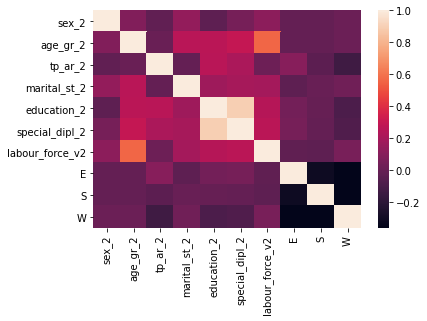

In [33]:
# Запустить эту проверку после преобразований всех нужных колонок:

sns.heatmap(df2.corr()) # показывает корреляцию данных между собой

In [34]:
# Независимая переменная - входящие данные для прогноза:

X = df2.drop('labour_force_v2', axis=1)

# Зависимая переменная (прогнозируемая):

y = df2['labour_force_v2'] 

In [35]:
# Вызываем train_test_split, чтобы разбить данные на 2 части (80\20):

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [36]:
# Как результат train_test_split, получаем 4 массива данных:

train_test_split(X, y, test_size=0.20, random_state=101)

[        sex_2  age_gr_2  tp_ar_2  marital_st_2  education_2  special_dipl_2  \
 4028        0         0        1             0            1               0   
 14943       0         0        1             0            3               1   
 1380        0         1        1             1            3               1   
 46111       1         1        1             0            3               1   
 210127      0         1        0             1            3               1   
 ...       ...       ...      ...           ...          ...             ...   
 55293       1         1        1             0            3               1   
 136767      0         1        1             0            1               0   
 204614      1         0        0             1            2               1   
 214539      0         0        0             0            1               0   
 176991      1         0        0             1            1               0   
 
         E  S  W  
 4028    0  1  0  


## ПОДБОР МОДЕЛИ:

## 01_LogisticRegression (30 сек)

In [37]:
from sklearn.linear_model import LogisticRegression 

lm= LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

lr_y_pred = lm.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, lr_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, lr_y_pred))
print('Classification Report: \n', classification_report(y_test, lr_y_pred))

Accuracy Score: 0.7593203830961528
Confusion Matrix: 
 [[18107 10841]
 [ 2503 23992]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.63      0.73     28948
           1       0.69      0.91      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



In [39]:
lr_y_pred_train = lm.predict(X_train)

print('Accuracy Score:', accuracy_score(y_train, lr_y_pred_train))
print('Confusion Matrix: \n', confusion_matrix(y_train, lr_y_pred_train))
print('Classification Report: \n', classification_report(y_train, lr_y_pred_train))

Accuracy Score: 0.7578155648445004
Confusion Matrix: 
 [[71942 43716]
 [ 9993 96118]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.62      0.73    115658
           1       0.69      0.91      0.78    106111

    accuracy                           0.76    221769
   macro avg       0.78      0.76      0.75    221769
weighted avg       0.79      0.76      0.75    221769



## 02_KNeighborsClassifier (KNN) (5 мин)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knm = KNeighborsClassifier(n_neighbors=3, weights='uniform') # distance - вес точек соседей (ближайшие больше вес)
knm.fit(X_train, y_train)    # uniform - результат = distance

KNeighborsClassifier(n_neighbors=3)

In [41]:
knn_y_pred = knm.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, knn_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, knn_y_pred))
print('Classification Report: \n', classification_report(y_test, knn_y_pred))

Accuracy Score: 
 0.697815774759663
Confusion Matrix: 
 [[20366  8582]
 [ 8172 18323]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.70      0.71     28948
           1       0.68      0.69      0.69     26495

    accuracy                           0.70     55443
   macro avg       0.70      0.70      0.70     55443
weighted avg       0.70      0.70      0.70     55443



In [42]:
knn_y_pred_train = knm.predict(X_train)

print('Accuracy Score:', accuracy_score(y_train, knn_y_pred_train))
print('Confusion Matrix: \n', confusion_matrix(y_train, knn_y_pred_train))
print('Classification Report: \n', classification_report(y_train, knn_y_pred_train))

Accuracy Score: 0.6967384981670116
Confusion Matrix: 
 [[81064 34594]
 [32660 73451]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.70      0.71    115658
           1       0.68      0.69      0.69    106111

    accuracy                           0.70    221769
   macro avg       0.70      0.70      0.70    221769
weighted avg       0.70      0.70      0.70    221769



## 03_DecisionTreeClassifier (самая подходящая: точность, скорость - 10 сек)

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_model = DecisionTreeClassifier()
dt_clf_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
dt_y_pred = dt_clf_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, dt_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, dt_y_pred))
print('Classification Report: \n', classification_report(y_test, dt_y_pred))

Accuracy Score: 
 0.7622783759897552
Confusion Matrix: 
 [[18619 10329]
 [ 2851 23644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74     28948
           1       0.70      0.89      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



In [45]:
dt_y_pred_train = dt_clf_model.predict(X_train)

print('Accuracy Score:', accuracy_score(y_train, dt_y_pred_train))
print('Confusion Matrix: \n', confusion_matrix(y_train, dt_y_pred_train))
print('Classification Report: \n', classification_report(y_train, dt_y_pred_train))

Accuracy Score: 0.7607961437351478
Confusion Matrix: 
 [[73899 41759]
 [11289 94822]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74    115658
           1       0.69      0.89      0.78    106111

    accuracy                           0.76    221769
   macro avg       0.78      0.77      0.76    221769
weighted avg       0.78      0.76      0.76    221769



## 04_RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_model = RandomForestClassifier()
rf_clf_model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
rf_y_pred = rf_clf_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report: \n', classification_report(y_test, rf_y_pred))

Accuracy Score: 
 0.7622783759897552
Confusion Matrix: 
 [[18619 10329]
 [ 2851 23644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74     28948
           1       0.70      0.89      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



## 05_SVM (расчет +/- 80 минут)

In [48]:
from sklearn import svm

svm_clf_model = svm.SVC() # другое ядро?? kernel='linear' # {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
svm_clf_model.fit(X_train, y_train)

SVC()

In [50]:
svm_y_pred = svm_clf_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report: \n', classification_report(y_test, svm_y_pred))

Accuracy Score: 
 0.7619356816911061
Confusion Matrix: 
 [[18532 10416]
 [ 2783 23712]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74     28948
           1       0.69      0.89      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



## 06_AdaBoostClassifier (быстрый)

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf_model = AdaBoostClassifier(random_state = 100)
ada_clf_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [52]:
ada_y_pred = ada_clf_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, ada_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, ada_y_pred))
print('Classification Report: \n', classification_report(y_test, ada_y_pred))

Accuracy Score: 
 0.7595728946846311
Confusion Matrix: 
 [[18244 10704]
 [ 2626 23869]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.63      0.73     28948
           1       0.69      0.90      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



## 07_AdaBoostClassifier (base_estimator = rf_clf_model) +/- 30 мин

In [53]:
from sklearn.ensemble import AdaBoostClassifier

ada_rf_model = AdaBoostClassifier(base_estimator = rf_clf_model)
ada_rf_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [54]:
ada_rf_y_pred = ada_rf_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, ada_rf_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, ada_rf_y_pred))
print('Classification Report: \n', classification_report(y_test, ada_rf_y_pred))

Accuracy Score: 
 0.7622783759897552
Confusion Matrix: 
 [[18619 10329]
 [ 2851 23644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74     28948
           1       0.70      0.89      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



## 08_Hyper Parameter Tunning Random Forest_Randomized Search CV 2,5 часа

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100, 1000, 3)] # start\stop\step

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, 3)] # start\stop\step

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]

# Minimum number samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create a random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'criterion': ['entropy', 'gini']
}

print(random_grid)

{'n_estimators': [100, 550, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 55, 100], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [1, 2, 4], 'criterion': ['entropy', 'gini']}


In [56]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 100, n_jobs = -1)

rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 76.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 143.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 55, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 550, 1000]},
                   random_state=100, verbose=2)

In [57]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [58]:
rf_randomcv_model = rf_randomcv.best_estimator_
rf_randomcv_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1000)

In [59]:
rf_randomcv_model_y_pred = rf_randomcv_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, rf_randomcv_model_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_randomcv_model_y_pred))
print('Classification Report: \n', classification_report(y_test, rf_randomcv_model_y_pred))

Accuracy Score: 
 0.7622783759897552
Confusion Matrix: 
 [[18619 10329]
 [ 2851 23644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74     28948
           1       0.70      0.89      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



## 09_Gridsearch CV (rf_randomcv.best_params_) 46 мин

In [66]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [67]:
# Create a param grid
param_grid = {'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, rf_randomcv.best_params_['n_estimators'], rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200],
                'max_features': [rf_randomcv.best_params_['max_features']],
                'max_depth': [rf_randomcv.best_params_['max_depth']],
                'min_samples_split': [rf_randomcv.best_params_['min_samples_split']-1, rf_randomcv.best_params_['min_samples_split'], rf_randomcv.best_params_['min_samples_split'] +1],
                'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf']],
                'criterion': [rf_randomcv.best_params_['criterion']]
}

print(param_grid)

{'n_estimators': [900, 1000, 1100, 1200], 'max_features': ['sqrt'], 'max_depth': [10], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [1], 'criterion': ['gini']}


In [68]:
from sklearn.model_selection import GridSearchCV

rf2 = RandomForestClassifier()
rf_gridcv = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

rf_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 45.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [900, 1000, 1100, 1200]},
             verbose=2)

In [69]:
rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 900}

In [70]:
rf_gridcv_model = rf_gridcv.best_estimator_

rf_gridcv_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=900)

In [71]:
rf_gridcv_y_pred = rf_gridcv_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, rf_gridcv_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_gridcv_y_pred))
print('Classification Report: \n', classification_report(y_test, rf_gridcv_y_pred))

Accuracy Score: 
 0.7622783759897552
Confusion Matrix: 
 [[18619 10329]
 [ 2851 23644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74     28948
           1       0.70      0.89      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443



## 10_SVM Hyper parameter tunning (estimator = svm_clf_model) 13 часов +2 часа

In [62]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10], 'kernel': ['linear']}, 
                {'C': [1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3]}]

svc_grid_search = GridSearchCV(estimator = svm_clf_model, param_grid=parameters, scoring = 'accuracy', cv = 10, n_jobs = -1, verbose = 2)

svc_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 224.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 787.0min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10], 'kernel': ['linear']},
                         {'C': [1, 10], 'gamma': [0.1, 0.2, 0.3],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [63]:
svc_grid_search.best_params_ 

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}

In [64]:
svc_grid_search_model = svc_grid_search.best_estimator_

svc_grid_search_model.fit(X_train, y_train)

SVC(C=10, gamma=0.3)

In [65]:
svc_grid_search_y_pred = svc_grid_search_model.predict(X_test)

print('Accuracy Score: \n', accuracy_score(y_test, svc_grid_search_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, svc_grid_search_y_pred))
print('Classification Report: \n', classification_report(y_test, svc_grid_search_y_pred))

Accuracy Score: 
 0.7622783759897552
Confusion Matrix: 
 [[18619 10329]
 [ 2851 23644]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.64      0.74     28948
           1       0.70      0.89      0.78     26495

    accuracy                           0.76     55443
   macro avg       0.78      0.77      0.76     55443
weighted avg       0.79      0.76      0.76     55443

